# Bmad-Genesis4 interface

Genesis4 input and lattice can be created from Bmad using PyTao's Tao interface.

In [1]:
from pytao import Tao

from genesis.version4 import Genesis4, Lattice, MainInput

import matplotlib.pyplot as plt

from pmd_beamphysics.units import mec2
import numpy as np

In [2]:
bmad_lat = "data/example1-steadystate/Example1.bmad"

# Lattice from Tao

In [3]:
tao = Tao(lattice_file=bmad_lat, noplot=True)

In [4]:
Lattice.from_tao(tao)

Lattice(
  elements={
    'UND': Undulator(aw=0.8485300000000002, lambdau=0.015, nwig=266, helical=True),
    'D1': Drift(L=0.44),
    'QF': Quadrupole(L=0.08, k1=2.0),
    'D2': Drift(L=0.24),
    'QD': Quadrupole(L=0.08, k1=-2.0),
    'END': Marker(),
    'FEL': Line(
      elements=[
        'UND',
        'D1',
        'QF',
        'D2',
        'UND',
        'D1',
        'QD',
        'D2',
        'UND',
        'D1',
        'QF',
        'D2',
        'UND',
        'D1',
        'QD',
        'D2',
        'UND',
        'D1',
        'QF',
        'D2',
        'UND',
        'D1',
        'QD',
        'D2',
        'UND',
        'D1',
        'QF',
        'D2',
        'UND',
        'D1',
        'QD',
        'D2',
        'UND',
        'D1',
        'QF',
        'D2',
        'UND',
        'D1',
        'QD',
        'D2',
        'UND',
        'D1',
        'QF',
        'D2',
        'UND',
        'D1',
        'QD',
        'D2',
        'END',
      ],
    ),
  },
)

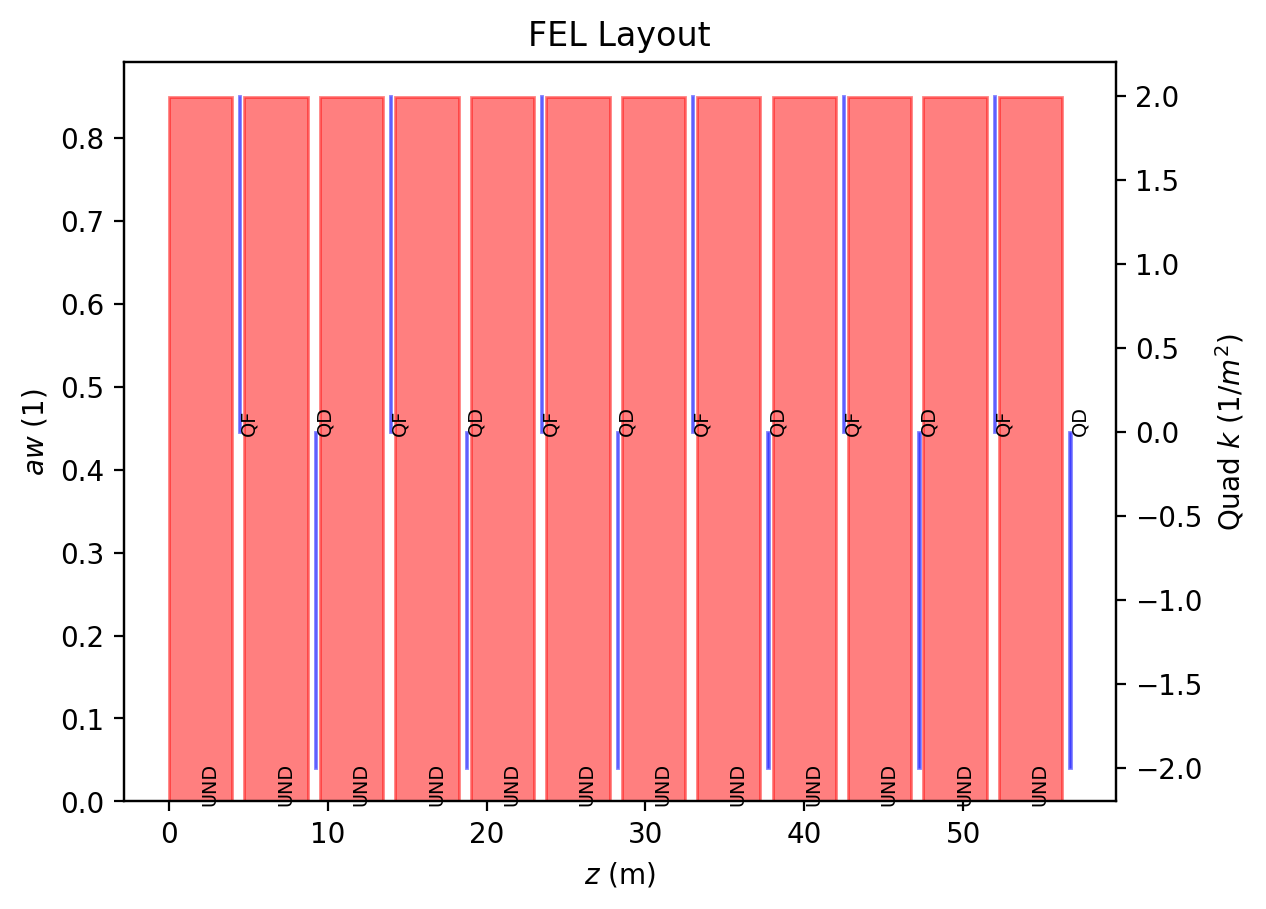

In [5]:
Lattice.from_tao(tao).plot()

# MainInput from Tao

In [6]:
MainInput.from_tao(tao)

MainInput(
  namelists=[
    Setup(rootname='FEL', beamline='FEL', gamma0=11357.82),
    Field(power=5000.0, waist_size=3e-05, dgrid=0.0002, ngrid=255),
    Beam(
      gamma=11357.82,
      betax=8.5371132,
      betay=17.38992039,
      alphax=-0.70330585,
      alphay=1.40347554,
    ),
    Track(),
  ],
  filename=None,
)

# Entire object

In [7]:
Genesis4.from_tao(tao)

# Compare tracking 

In [8]:
tao = Tao(lattice_file=bmad_lat, noplot=True)

# Add various errors

tao.cmd("set particle_start x = 50e-6")
tao.cmd("set particle_start y = -40e-6")

tao.cmd("set particle_start px = 10e-6")
tao.cmd("set particle_start py = 20e-6")
tao.cmd("set particle_start pz = 1e-4")

tao.cmd("set ele qf x_offset = 50e-6")
tao.cmd("set ele qd y_offset = -50e-6")

tao.cmd("set ele qf hkick = 10e-6")
tao.cmd("set ele qd vkick = -10e-6")

[]

In [9]:
%%time
# Create and run Genesis4
G4 = Genesis4.from_tao(tao)
G4.run();

[Christophers-MacBook-Pro.local:67632] shmem: mmap: an error occurred while determining whether or not /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T//ompi.Christophers-MacBook-Pro.501/jf.0/1384382464/sm_segment.Christophers-MacBook-Pro.501.52840000.0 could be created.


CPU times: user 43.1 ms, sys: 15.8 ms, total: 58.9 ms
Wall time: 15.5 s


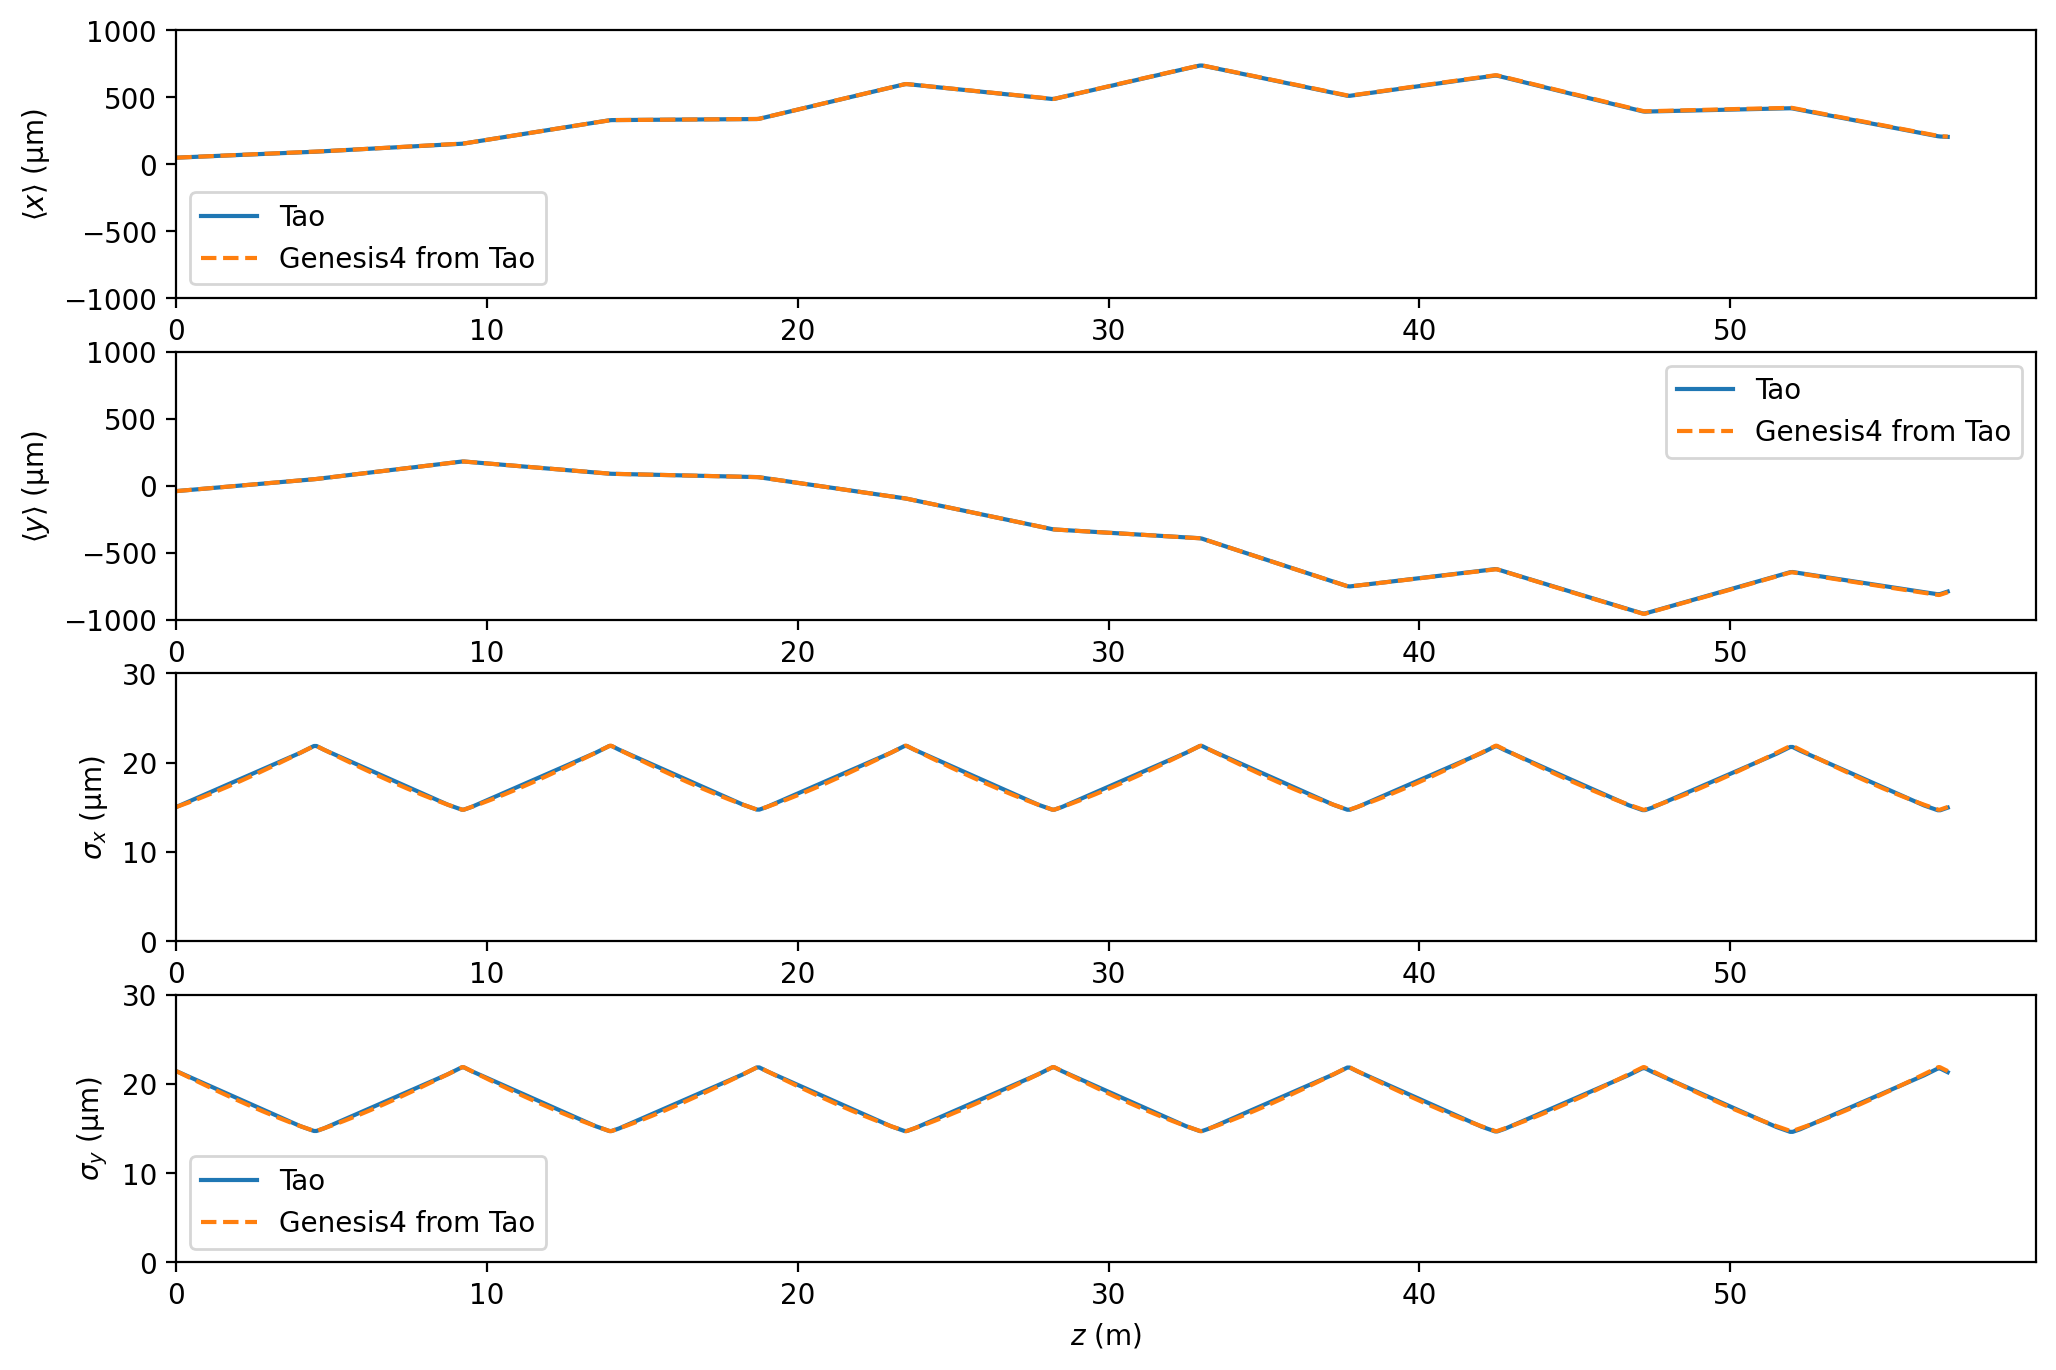

In [10]:
def comparison_plots(tao, genesis4):
    s = tao.lat_list("*", "ele.s")
    z = G4.output.stat("zplot")

    fig, axes = plt.subplots(4, figsize=(12, 8))

    ax = axes[0]
    y0 = tao.lat_list("*", "orbit.vec.1")
    y1 = G4.output.stat("beam_xposition")
    ax.plot(s, y0 * 1e6, label="Tao")
    ax.plot(z, y1 * 1e6, "--", label="Genesis4 from Tao")
    ax.set_ylabel(r"$\left<x\right>$ (µm)")
    ax.set_ylim(-1000, 1000)
    ax.legend()

    ax = axes[1]
    y0 = tao.lat_list("*", "orbit.vec.3")
    y1 = G4.output.stat("beam_yposition")
    ax.plot(s, y0 * 1e6, label="Tao")
    ax.plot(z, y1 * 1e6, "--", label="Genesis4 from Tao")
    ax.set_ylabel(r"$\left<y\right>$ (µm)")
    ax.set_ylim(-1000, 1000)
    ax.legend()

    ax = axes[2]
    y0 = np.sqrt(
        tao.lat_list("*", "ele.a.beta")
        * G4.output.beam.emitx[0, 0]
        / (tao.lat_list("*", "ele.e_tot") / mec2)
    )
    y1 = G4.output.stat("beam_xsize")
    ax.plot(s, y0 * 1e6, label="Tao")
    ax.plot(z, y1 * 1e6, "--", label="Genesis4 from Tao")
    ax.set_ylabel(r"$\sigma_x$ (µm)")
    ax.set_ylim(0, 30)

    ax = axes[3]
    y0 = np.sqrt(
        tao.lat_list("*", "ele.b.beta")
        * G4.output.beam.emity[0, 0]
        / (tao.lat_list("*", "ele.e_tot") / mec2)
    )
    y1 = G4.output.stat("beam_ysize")
    ax.plot(s, y0 * 1e6, label="Tao")
    ax.plot(z, y1 * 1e6, "--", label="Genesis4 from Tao")
    ax.set_ylabel(r"$\sigma_y$ (µm)")
    ax.set_ylim(0, 30)

    ax.legend()
    ax.set_xlabel(r"$z$ (m)")
    for ax in axes:
        ax.set_xlim(0, None)

comparison_plots(tao, G4)